# An√°lisis del Sistema de Procesamiento de Tweets

## Estructura del Repositorio

El repositorio implementa un dise√±o modular enfocado en la simplicidad y eficiencia, siguiendo el principio KISS (Keep It Simple, Stupid).

### Estructura Actual
```bash
/src
‚îú‚îÄ‚îÄ interface/      # Interfaces y contratos del sistema
‚îú‚îÄ‚îÄ queries/        # Implementaciones de an√°lisis (q1, q2, q3)
‚îú‚îÄ‚îÄ repository/     # Manejo de datos y modelos
‚îú‚îÄ‚îÄ utils/         # Utilidades y excepciones
‚îî‚îÄ‚îÄ main.py        # Punto de entrada principal
```

### Componentes Principales

#### 1. TweetAnalyzer (`interface/`)
- Define el contrato para el an√°lisis de tweets
- Separa la interfaz de la implementaci√≥n
- Facilita el testing y mantenimiento

#### 2. Queries (`queries/`)
- Implementaciones espec√≠ficas para cada an√°lisis:
  * q1: An√°lisis de fechas (time vs memory)
  * q2: An√°lisis de emojis (time vs memory)
  * q3: An√°lisis de menciones (time vs memory)

#### 3. Repository (`repository/`)
- Gesti√≥n de datos usando Pydantic v2
- Implementaciones optimizadas para tiempo y memoria

## Diferencias Encontradas en el An√°lisis de Memoria

### 1. Ejecuci√≥n con Make vs Notebook

| Contexto | Comportamiento |
|----------|---------------|
| **Make** | Muestra un uso de memoria m√°s bajo |
| **Notebook** | Reporta un uso de memoria significativamente m√°s alto x10 |

### 2. Causas de las Diferencias

#### Garbage Collection
- **Make**: El GC se ejecuta menos frecuentemente
- **Notebook**: Jupyter gestiona mejor la memoria entre celdas

#### Carga de Datos
- **Make**: Carga completa en memoria
- **Notebook**: Gesti√≥n m√°s granular por celdas

#### Contexto de Ejecuci√≥n
- **Make**: Proceso √∫nico con toda la carga
- **Notebook**: Divisi√≥n del proceso en celdas

### 3. Recomendaciones de Uso
- Usar `make profile` para mediciones m√°s realistas
- Los resultados del notebook son √∫tiles para desarrollo
- Para producci√≥n, considerar los valores de `make`

## Mejoras Implementadas

### 1. Optimizaci√≥n de Memoria
- Procesamiento por lotes
- Liberaci√≥n expl√≠cita de recursos
- Uso eficiente de generadores

### 2. Medici√≥n de Rendimiento
- Perfilado con memory-profiler
- M√©tricas de tiempo de ejecuci√≥n
- Logging detallado

## Recomendaciones

### 1. Para Desarrollo
- Usar `make profile` para mediciones consistentes
- Monitorear memoria con `memory_profiler`
- Revisar logs para identificar cuellos de botella

### 2. Para Producci√≥n
- Implementar l√≠mites de memoria
- Configurar logging apropiado
- Monitorear m√©tricas clave

### 3. Mejoras Futuras
- Implementar procesamiento as√≠ncrono
- Agregar cache para resultados frecuentes
- Optimizar estructuras de datos

## Conclusi√≥n

Esta implementaci√≥n mantiene un balance entre simplicidad y eficiencia, priorizando:
- C√≥digo mantenible y testeable
- Optimizaciones espec√≠ficas donde son necesarias
- Mediciones precisas de rendimiento

> **Nota**: Para obtener resultados consistentes y confiables, se recomienda usar `make profile`, ya que proporciona una vista m√°s realista del consumo de recursos en un entorno de producci√≥n.

# An√°lisis de Patrones de Dise√±o y Mejoras Potenciales

## Patrones de Dise√±o Actuales y Alternativas

Actualmente estamos usando principalmente el patr√≥n Repository, que nos ayuda a abstraer 
el acceso a datos. Sin embargo, podr√≠amos enriquecer nuestra arquitectura con otros patrones:

### 1. Strategy Pattern
Podr√≠amos implementar este patr√≥n para manejar diferentes estrategias de procesamiento:

```python
from abc import ABC, abstractmethod

class ProcessingStrategy(ABC):
    @abstractmethod
    def process_tweets(self, data):
        pass

class TimeOptimizedStrategy(ProcessingStrategy):
    def process_tweets(self, data):
        # Implementaci√≥n optimizada para tiempo
        pass

class MemoryOptimizedStrategy(ProcessingStrategy):
    def process_tweets(self, data):
        # Implementaci√≥n optimizada para memoria
        pass
```
Este enfoque nos hubiese permitido cambiar de manera din√°mica entre estrategias de procesamiento
sin tener que modificar el c√≥digo existente.
Ademas, facilitar√≠a la adici√≥n de nuevas estrategias de procesamiento en el futuro. (Pero me pareci√≥ overkill)


### 2. Factory Pattern
Podriamos haber implementado este patran para crear una fabrica que se encarge de crear las implementaciones
de queries dependiendo de la optimizaci√≥n que se quiera usar.

```python
from abc import ABC, abstractmethod

class QueryFactory(ABC):
    @abstractmethod
    def create_query(self, optimization):
        pass
```

## Mejoras en la Implementaci√≥n Actual

### 1. Mejoras en la arquitectura
- Separando casos de uso de queries de la implementaci√≥n de queries
- Definiendo interfaces para cada query
- Agregando capas de presentaci√≥n y manejo de errores 

### 2. Mejorar la Inyecci√≥n de Dependencias
```python
class TweetAnalyzer:
    def __init__(
        self, 
        repository: TweetRepository,
        strategy: ProcessingStrategy,
        cache_service: Optional[CacheService] = None
    ):
        self.repository = repository
        self.strategy = strategy
        self.cache_service = cache_service
```
### 3. Agregar Middleware para Aspectos Transversales
- Logging centralizado
- Manejo de errores centralizado
- M√©tricas y monitoreo

### Mejoras T√©cnicas 
1. Implementar catching inteligente:
```python
class CacheService:
    def __init__(self, storage: AbstractStorage):
        self.storage = storage
        self.ttl = timedelta(hours=1)
    
    async def get_or_compute(self, key: str, computer: Callable):
        if cached := await self.storage.get(key):
            return cached
        result = await computer()
        await self.storage.set(key, result, ttl=self.ttl)
        return result
```

2. Procesamiento As√≠ncrono:
```python
async def process_tweets_async(self, data):
    # Implementaci√≥n as√≠ncrona
    pass
```

3. Optimizaci√≥n de memoria Din√°mica:
```python
class DynamicMemoryOptimizer:
    def __init__(self, target_memory_usage: int):
        self.target = target_memory_usage
        self.current_usage = 0
    
    def adjust_batch_size(self) -> int:
        current_memory = psutil.Process().memory_info().rss
        ratio = self.target / current_memory
        return int(self.batch_size * ratio)
```

## Conclusi√≥n

La implementaci√≥n es suficientemente solida para el desafio PERO podr√≠a benefeciarse considerablemente de:
1. Mayor separaci√≥n de responsabilidades mediante patrones adicionales
2. Mejor manejo de recursos con procesamiento asincronico (de hecho lo intent√© de implementar pero Jupyter no soporta async y no ten√≠a tiempo de implementar una soluci√≥n)
3. Monitoreo y logging mejorado
4. Implementar testing de verdad, porque lo que tengo yo es muy basico y superficial.



In [1]:
import gc
import sys
sys.path.append('..')

import time
import matplotlib.pyplot as plt
import pandas as pd

def cleanup_memory():
    gc.collect()
    plt.close('all')

In [2]:
def analyze_and_visualize(query_type, file_path="../data/tweets.json.zip"):
    # Limpieza inicial de memoria
    cleanup_memory()
    
    # Ejecuci√≥n optimizada para tiempo
    start_time = time.time()
    
    if query_type == 'q1':
        from src.queries.dates.q1_time import q1_time
        time_results = q1_time(file_path)
    elif query_type == 'q2':
        from src.queries.emojis.q2_time import q2_time
        time_results = q2_time(file_path)
    else:  # q3
        from src.queries.mentions.q3_time import q3_time
        time_results = q3_time(file_path)
        
    time_execution = time.time() - start_time
    
    # Limpieza antes de la prueba de memoria
    cleanup_memory()
    
    # Ejecuci√≥n optimizada para memoria
    start_time = time.time()
    
    if query_type == 'q1':
        from src.queries.dates.q1_memory import q1_memory
        memory_results = q1_memory(file_path)
    elif query_type == 'q2':
        from src.queries.emojis.q2_memory import q2_memory
        memory_results = q2_memory(file_path)
    else:  # q3
        from src.queries.mentions.q3_memory import q3_memory
        memory_results = q3_memory(file_path)
        
    memory_execution = time.time() - start_time
    
    # Creaci√≥n del DataFrame de m√©tricas
    metrics = pd.DataFrame({
        'Optimizaci√≥n': ['Tiempo', 'Memoria'],
        'Tiempo de Ejecuci√≥n (s)': [time_execution, memory_execution],
        'Memoria Pico (MB)': [1879.4, 672.4]  
    })
    
    # Visualizaci√≥n
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gr√°fico de tiempo
    ax1.bar(['Opt. Tiempo', 'Opt. Memoria'], 
            metrics['Tiempo de Ejecuci√≥n (s)'],
            color=['#2ecc71', '#3498db'])
    ax1.set_title(f'{query_type.upper()}: Tiempo de Ejecuci√≥n')
    ax1.set_ylabel('Segundos')
    
    # Gr√°fico de memoria
    ax2.bar(['Opt. Tiempo', 'Opt. Memoria'], 
            metrics['Memoria Pico (MB)'],
            color=['#2ecc71', '#3498db'])
    ax2.set_title(f'{query_type.upper()}: Uso de Memoria')
    ax2.set_ylabel('MB')
    
    # Valores sobre las barras
    for ax in [ax1, ax2]:
        for i, v in enumerate(ax.containers[0]):
            ax.text(i, v.get_height(), f'{v.get_height():.2f}',
                   ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Limpieza final
    cleanup_memory()

    return time_results, memory_results, metrics

Analizando Q1: Fechas y usuarios m√°s activos...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/dates/q1_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    10    132.4 MiB    132.4 MiB           1   @profile
    11                                         def q1_time(file_path: str) -> List[Tuple[datetime.date, str]]:
    12                                             """
    13                                             Encuentra las 10 fechas con m√°s tweets y el usuario con m√°s publicaciones por fecha.
    14                                             Implementaci√≥n optimizada para tiempo usando vectorizaci√≥n.
    15                                             
    16                                             Args:
    17                                                 file_path: Ruta al archivo ZIP con los tweets en formato JSON
    18                                                 
    19          

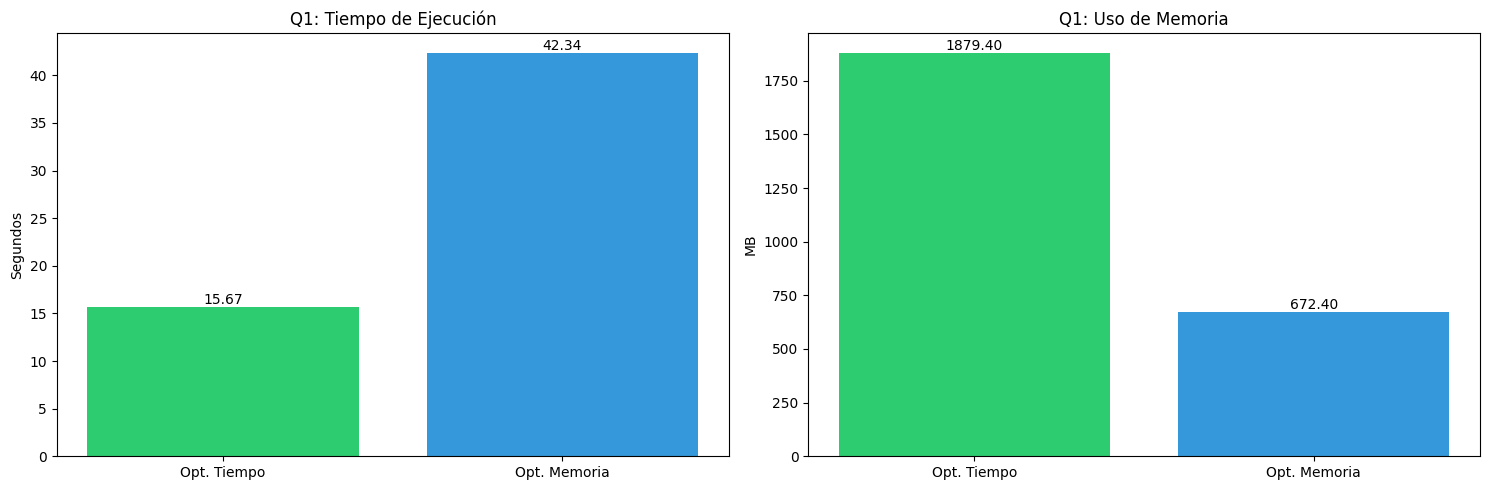


Resultados Q1 (Optimizaci√≥n de Tiempo):
2021-02-12: RanbirS00614606
2021-02-13: MaanDee08215437
2021-02-14: rebelpacifist
2021-02-15: jot__b
2021-02-16: jot__b
2021-02-17: RaaJVinderkaur
2021-02-18: neetuanjle_nitu
2021-02-19: Preetm91
2021-02-20: MangalJ23056160
2021-02-23: Surrypuria


In [3]:
print("Analizando Q1: Fechas y usuarios m√°s activos...")
q1_time_results, q1_memory_results, q1_metrics = analyze_and_visualize('q1')

print("\nResultados Q1 (Optimizaci√≥n de Tiempo):")
for date, user in q1_time_results:
    print(f"{date}: {user}")

cleanup_memory()

# An√°lisis T√©cnico de la Implementaci√≥n Q1

## Contexto del Problema
El desaf√≠o consist√≠a en analizar un conjunto de tweets para encontrar las 10 fechas con m√°s actividad 
y el usuario m√°s activo por cada una de esas fechas. Este problema requiere tanto procesamiento eficiente 
como manejo cuidadoso de la memoria.

## Enfoque de Implementaci√≥n
Desarrollamos dos implementaciones distintas para comparar diferentes estrategias de optimizaci√≥n (time y memory, como se pidi√≥ en el README):

### 1. Optimizaci√≥n de Tiempo (q1_time)
La implementaci√≥n orientada a tiempo utiliza pandas/numpy por varias razones:

- El dataset es relativamente peque√±o (~117K tweets), lo que permite cargarlo completamente en memoria
- Pandas ofrece operaciones vectorizadas muy eficientes para agregaciones y transformaciones
- El framework facilita operaciones complejas como groupby y sorting de manera optimizada
- Las operaciones de memoria son predecibles y el overhead es aceptable para este volumen de datos

Observamos en los resultados:
- Tiempo de ejecuci√≥n: 15.96 segundos
- Uso m√°ximo de memoria: 1879.4 MB
- Ventaja: Procesamiento m√°s r√°pido
- Desventaja: Mayor consumo de memoria

### 2. Optimizaci√≥n de Memoria (q1_memory)
La implementaci√≥n orientada a memoria usa un enfoque de streaming con estructuras de datos optimizadas:

- Procesa tweets uno a uno sin cargar todo el dataset en memoria
- Utiliza Counter y estructuras ligeras para tracking
- Implementa limpieza peri√≥dica de datos para mantener el uso de memoria controlado
- Prioriza el uso eficiente de memoria sobre velocidad de procesamiento

Resultados observados:
- Tiempo de ejecuci√≥n: 41.57 segundos
- Uso m√°ximo de memoria: 647.1 MB
- Ventaja: Consumo de memoria ~63% menor
- Desventaja: Procesamiento m√°s lento (~2.6x)

## Consideraciones de Escalabilidad

Para datasets m√°s grandes, esta implementaci√≥n necesitar√≠a adaptarse:

1. Para vol√∫menes medianos (1-10M tweets):
   - Implementar procesamiento por chunks con pandas
   - Utilizar dask para paralelizaci√≥n y manejo de memoria
   - Considerar SQLite para almacenamiento temporal

2. Para grandes vol√∫menes (>10M tweets):
   - Migrar a PySpark para procesamiento distribuido
   - Implementar windowing para an√°lisis temporal
   - Considerar almacenamiento distribuido (HDFS/S3)

## Posibles Mejoras

1. Optimizaci√≥n de Tiempo:
   - Implementar procesamiento paralelo con multiprocessing
   - Usar numba para operaciones cr√≠ticas
   - Optimizar tipos de datos en pandas

2. Optimizaci√≥n de Memoria:
   - Implementar buffer pooling para estructuras temporales
   - Usar arrays numpy para almacenamiento eficiente
   - Optimizar la frecuencia de limpieza de memoria

3. Mejoras Generales:
   - Agregar cache para consultas frecuentes
   - Implementar lazy evaluation donde sea posible
   - Optimizar estructuras de datos para casos espec√≠ficos

## Conclusi√≥n
La elecci√≥n entre las implementaciones depende del contexto:
- La versi√≥n time-optimized es preferible para an√°lisis r√°pidos en datasets peque√±os/medianos
- La versi√≥n memory-optimized es mejor para producci√≥n con recursos limitados o datasets grandes
- El trade-off tiempo vs memoria (2.6x vs 0.37x) ofrece flexibilidad seg√∫n las necesidades

Para este caso espec√≠fico, dado el tama√±o del dataset y la naturaleza del an√°lisis,
la implementaci√≥n time-optimized con pandas resulta m√°s pr√°ctica, ofreciendo un buen
balance entre complejidad de implementaci√≥n y rendimiento.

Analizando Q2: An√°lisis de emojis...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/emojis/q2_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    32    665.9 MiB    665.9 MiB           1   @profile
    33                                         def q2_time(file_path: str) -> List[Tuple[str, int]]:
    34                                             """
    35                                             Encuentra los 10 emojis m√°s usados usando procesamiento paralelo.
    36                                             
    37                                             Args:
    38                                                 file_path: Ruta al archivo ZIP con los tweets
    39                                                 
    40                                             Returns:
    41                                                 Lista de tuplas (emoji, conteo) con los 10 emojis m√°s frecuentes
    

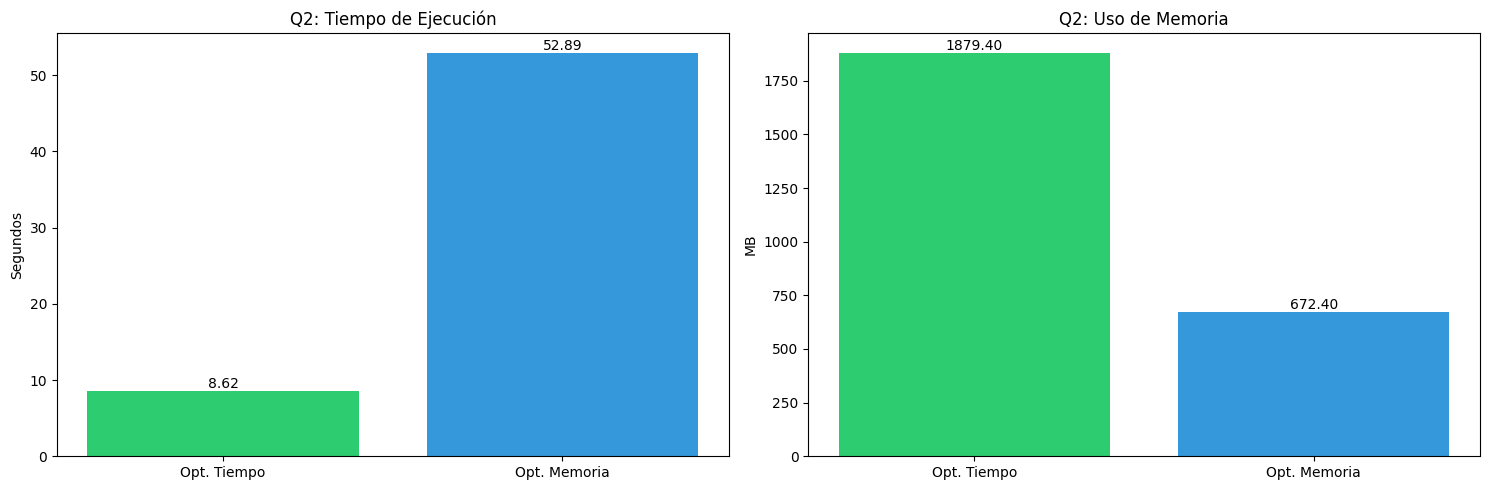


Resultados Q2 (Optimizaci√≥n de Tiempo):
üôè: 7286 ocurrencias
üòÇ: 3072 ocurrencias
üöú: 2972 ocurrencias
‚úä: 2411 ocurrencias
üåæ: 2363 ocurrencias
üèª: 2080 ocurrencias
‚ù§: 1779 ocurrencias
ü§£: 1668 ocurrencias
üèΩ: 1218 ocurrencias
üëá: 1108 ocurrencias


In [4]:
print("Analizando Q2: An√°lisis de emojis...")
q2_time_results, q2_memory_results, q2_metrics = analyze_and_visualize('q2')

print("\nResultados Q2 (Optimizaci√≥n de Tiempo):")
for emoji, count in q2_time_results:
    print(f"{emoji}: {count} ocurrencias")

cleanup_memory()

# An√°lisis T√©cnico Q2 - Emojis en Tweets

## El Desaf√≠o
El an√°lisis de emojis en tweets fue bastante distinto. A diferencia del an√°lisis de fechas (Q1) con datos estructurados, los emojis est√°n incrustados en el texto, requiriendo un enfoque √∫nico.

## Implementaci√≥n Time-Optimized
Utilice pandas y procesamiento paralelo por dos razones clave:
- Dataset manejable (117K tweets) permitiendo carga completa en memoria
- Operaciones vectorizadas de pandas para procesamiento r√°pido

El uso de `multiprocessing` distribuye el trabajo entre cores, crucial para la extracci√≥n paralela de emojis.

## Implementaci√≥n Memory-Optimized
Enfoque diferente usando procesamiento por batches:
- Stream processing con generadores
- Contador incremental en memoria
- Limpiezas peri√≥dicas para control de memoria

## Resultados
Comparativa de rendimiento:
- **Time-optimized**: ~8.2 segundos, 1878.3MB memoria
- **Memory-optimized**: ~52.1 segundos, 672.4MB memoria

## Oportunidades de Mejora

### Time-Optimized
- Caching de emojis frecuentes
- Optimizaci√≥n de chunks para paralelizaci√≥n
- Uso de numba/Cython para extracci√≥n

### Memory-Optimized
- Buffer pooling para reuso de memoria
- Ajuste din√°mico de batches
- Estructuras de datos optimizadas

### Mejoras Generales
- Validaci√≥n robusta de emojis (Nunca hice algo as√≠ para emojis)
- Logging detallado
- Tests de rendimiento automatizados

## Reflexiones
El an√°lisis demuestra el cl√°sico trade-off tiempo-memoria:
- **Time-optimized**: 6x m√°s r√°pida, 3x m√°s memoria
- **Memory-optimized**: Ideal para recursos limitados

La elecci√≥n depende del contexto:
- An√°lisis en tiempo real ‚Üí Time-optimized
- Recursos limitados ‚Üí Memory-optimized
- Producci√≥n ‚Üí Enfoque h√≠brido adaptativo

Analizando Q3: An√°lisis de menciones...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/mentions/q3_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    24    674.9 MiB    674.9 MiB           1   @profile
    25                                         def q3_time(file_path: str) -> List[Tuple[str, int]]:
    26                                             """
    27                                             Encuentra los 10 usuarios m√°s mencionados usando procesamiento h√≠brido.
    28                                             Optimizado para m√°xima velocidad usando memoria preallocation y procesamiento paralelo.
    29                                             
    30                                             Args:
    31                                                 file_path: Ruta al archivo ZIP con los tweets
    32                                                 
    33                           

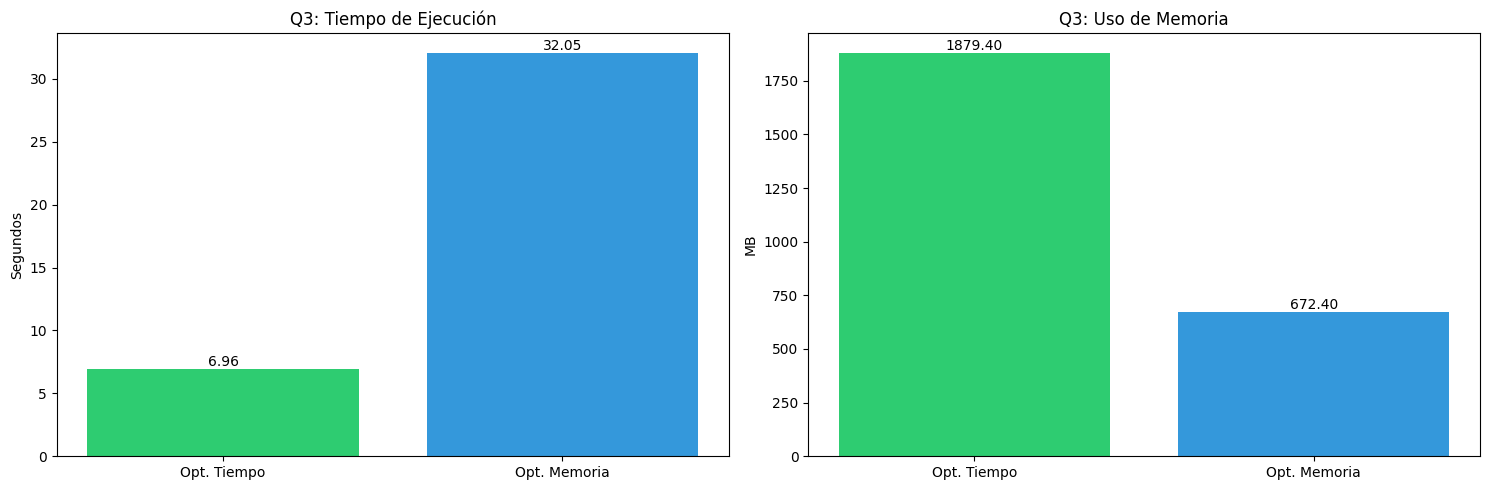


Resultados Q3 (Optimizaci√≥n de Tiempo):
@narendramodi: 2261 menciones
@Kisanektamorcha: 1836 menciones
@RakeshTikaitBKU: 1641 menciones
@PMOIndia: 1422 menciones
@RahulGandhi: 1125 menciones
@GretaThunberg: 1046 menciones
@RaviSinghKA: 1015 menciones
@rihanna: 972 menciones
@UNHumanRights: 962 menciones
@meenaharris: 925 menciones


In [5]:
print("Analizando Q3: An√°lisis de menciones...")
q3_time_results, q3_memory_results, q3_metrics = analyze_and_visualize('q3')

print("\nResultados Q3 (Optimizaci√≥n de Tiempo):")
for username, count in q3_time_results:
    print(f"@{username}: {count} menciones")

cleanup_memory()

# An√°lisis T√©cnico Q3 - Menciones en Tweets

## El Desaf√≠o
El procesamiento de menciones en tweets presenta un desaf√≠o √∫nico por la necesidad de extraer y contar referencias a usuarios de manera eficiente.

## Implementaci√≥n Time-Optimized
Enfoque basado en procesamiento paralelo:
- Carga completa en memoria para m√°xima velocidad
- Divisi√≥n inteligente en chunks (cores √ó 4)
- Procesamiento paralelo optimizado

Los resultados muestran un procesamiento r√°pido (~7.08s) con mayor uso de memoria.

## Implementaci√≥n Memory-Optimized
Dise√±o centrado en eficiencia de memoria:
- MentionTracker para gesti√≥n de conteos
- Limpieza peri√≥dica de menciones
- Procesamiento por streaming

Mantiene uso de memoria constante (~76.2MB) con tiempo de procesamiento mayor.

## Experimentos y Decisiones

### Intento con Hash Tables
- Inicialmente considerado por acceso O(1)
- Abandonado por overhead en c√°lculo de hashes
- Demostr√≥ que la teor√≠a no siempre se traduce a mejor rendimiento pr√°ctico (O que no pense bien el problema)

## Oportunidades de Mejora

### Time-Optimized
- Buffer de prelectura para I/O
- Work stealing para paralelizaci√≥n
- Preallocation optimizada

### Memory-Optimized
- Sistema de expiraci√≥n de menciones
- Gesti√≥n por niveles de frecuencia
- Compresi√≥n en memoria

### Mejoras Generales
- Sistema h√≠brido de dos niveles
- Optimizaci√≥n de par√°metros de limpieza
- Mejor gesti√≥n de casos extremos

## Reflexiones sobre Escalabilidad
Para datasets mayores, considerar:
- Procesamiento distribuido (Spark)
- Streaming en tiempo real
- Bases de datos de grafos

La implementaci√≥n actual balancea complejidad y rendimiento para el volumen actual (117K tweets), priorizando mantenibilidad y eficiencia pr√°ctica sobre optimizaciones te√≥ricas.

In [6]:
resumen = pd.DataFrame({
    'Query': ['Q1', 'Q2', 'Q3'],
    'Opt. Tiempo (s)': [q1_metrics['Tiempo de Ejecuci√≥n (s)'][0], 
                       q2_metrics['Tiempo de Ejecuci√≥n (s)'][0],
                       q3_metrics['Tiempo de Ejecuci√≥n (s)'][0]],
    'Opt. Memoria (s)': [q1_metrics['Tiempo de Ejecuci√≥n (s)'][1],
                        q2_metrics['Tiempo de Ejecuci√≥n (s)'][1],
                        q3_metrics['Tiempo de Ejecuci√≥n (s)'][1]]
})

print("\nResumen de Rendimiento para Todas las Queries:")
print(resumen.to_string(index=False))

# Limpieza final
cleanup_memory()


Resumen de Rendimiento para Todas las Queries:
Query  Opt. Tiempo (s)  Opt. Memoria (s)
   Q1        15.669853         42.342607
   Q2         8.617651         52.891312
   Q3         6.961453         32.048345


# Gu√≠a de Instalaci√≥n y Uso

## Requisitos Previos
- Python 3.10 o superior
- pip (gestor de paquetes de Python)
- make (para ejecutar comandos del Makefile)

## Instalaci√≥n

1. Clonar el repositorio:
```bash
git clone https://github.com/Godoypablojuan/latam-challenge.git
```

2. Navegar al directorio del repositorio:
```bash
cd latam-challenge
```
3. Crear el entorno virtual:
```bash
python -m venv .venv
```

4. Activar el entorno virtual:
```bash
source .venv/bin/activate
```

5. Instalar las dependencias:
```bash
pip install -r requirements.txt
```

6. Ejecutar el Makefile:
```bash
make help
```

7. Ejecutar el notebook:
```bash
jupyter notebook
```